In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import confusion_matrix

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [31]:
filename='/content/gdrive/My Drive/creditcard.csv'
ds=pd.read_csv(filename)
ds.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


###check null values

In [32]:
ds.isna().any()

,0
Time,False
V1,False
V2,False
V3,False
V4,False
V5,False
V6,False
V7,False
V8,False
V9,False


###Find % of not Fraud and Fraud transaction data


In [35]:
nfcount=0
notFraud=ds['Class']
for i in range(len(notFraud)):
  if notFraud[i]==0:
    nfcount+=1
nfcount
per_nf=(nfcount/len(notFraud))*100
print("Percentage of not Fraud transactions",per_nf)

Percentage of not Fraud transactions 99.82725143693798


In [37]:
fcount=0
Fraud=ds['Class']
for i in range(len(Fraud)):
  if Fraud[i]==1:
    fcount+=1
fcount
per_f=(fcount/len(Fraud))*100
print("Percentage of Fraud transactions",per_f)

Percentage of Fraud transactions 0.1727485630620034


###Plot Amount vs Time

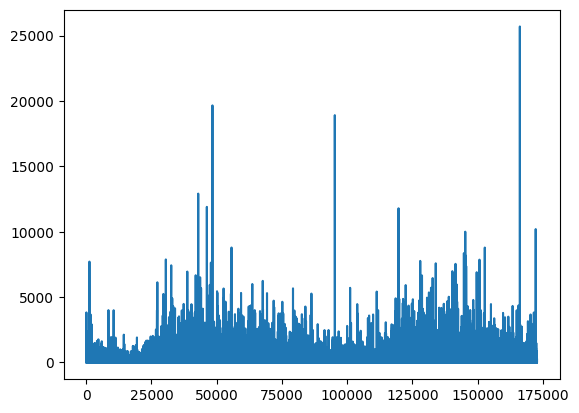

In [39]:
x=ds['Time']
y=ds['Amount']
plt.plot(x,y)
plt.show()

###Plot Amount Distribution Curve

/tmp/ipython-input-3000717242.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ds['Amount'],color='red')


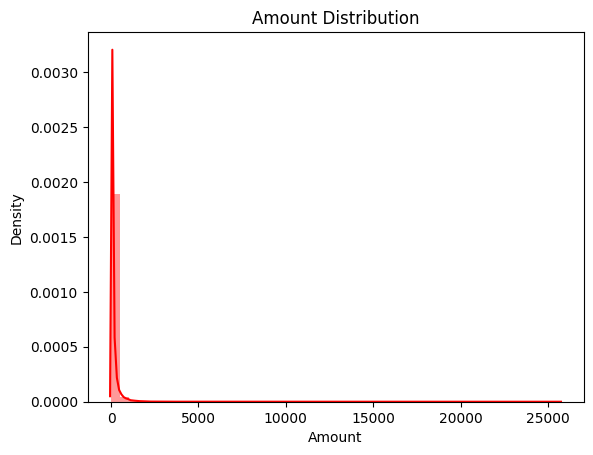

In [43]:
import seaborn as sns
sns.distplot(ds['Amount'],color='red')
plt.title('Amount Distribution')
plt.show()

###Correlation between Attributes

<Axes: >

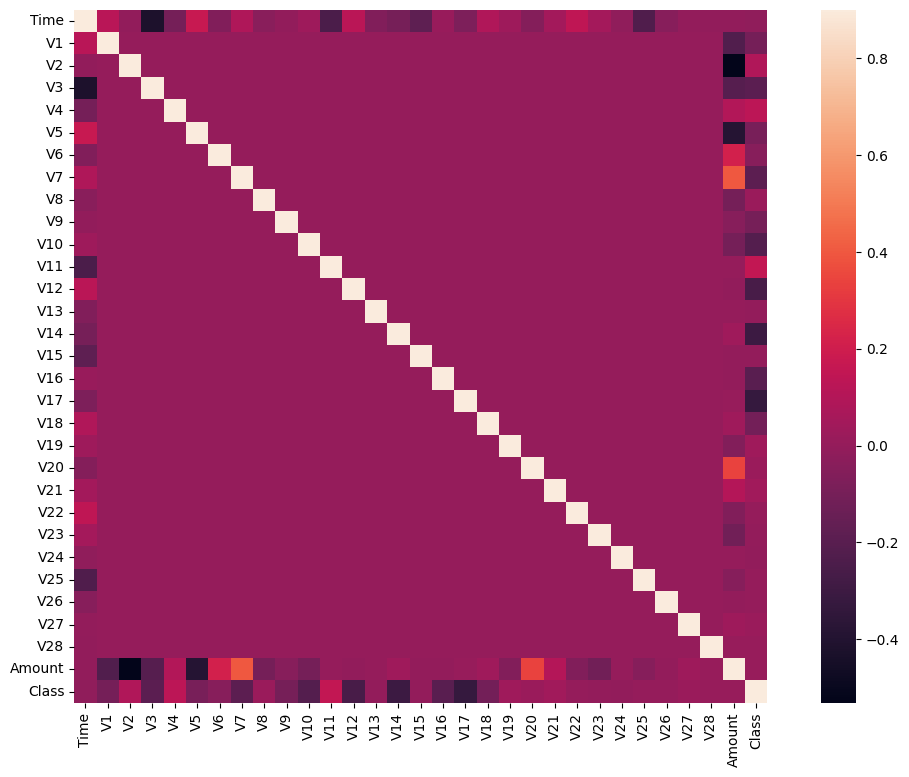

In [48]:
correlation_metrics=ds.corr()
fig = plt.figure(figsize = (14, 9))
sns.heatmap(correlation_metrics,vmax=.9,square=True)

In [53]:
x=ds.drop(['Class'], axis = 1)#drop the target variable

y=ds['Class']

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [54]:
from sklearn.linear_model import LinearRegression

linear =LinearRegression()

linear.fit(xtrain, ytrain)

LinearRegression()

In [55]:
y_pred = linear.predict(xtest)

table= pd.DataFrame({"Actual":ytest,"Predicted":y_pred})

table

,Actual,Predicted
43428,1,1.218185
49906,0,-0.000578
29474,0,-0.000726
276481,0,0.002957
278846,0,-0.001548
...,...,...
75723,0,-0.004392
252263,0,-0.000725
221246,0,0.001325
81910,0,0.001081
